# MSDS-432: Module 3 - Implement a Recursive Algorithm  
Jason Adam  

## Imports

In [1]:
import functools
import os
import string
import time
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext blackcellmagic

# GLOBAL
RAND_SEED: int = 432

In [2]:
class TimeFunc:
    """Decorator to return run time of function in seconds."""
    def __init__(self, func):
        functools.update_wrapper(self, func)
        self.func = func
        self.func_time = 0
        
    def __call__(self, *args, **kwargs):
        start_time = time.perf_counter()
        result = self.func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        self.func_time = run_time
        return result

## 1. Create Array of Random Integers  
Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).

In [9]:
#np.random.seed(RAND_SEED)
nums: List[int] = sorted([int(i) for i in np.random.randint(100, 500, 10)])

print(nums)

[122, 183, 217, 221, 270, 270, 295, 337, 389, 479]


## 2. Calculate Factorial - For Loop  
Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, or linked list, or dictionary. 

In [10]:
@TimeFunc
def fact_fl(x: int) -> int:
    """Calculate the factorial.
    
    This function uses a simple for loop.
    
    Parameters
    ----------
    x int:
        Integer value to calculate the factorial for.
        
    Returns
    -------
    int:
        The factorial of the input value.
    """
    if x <= 0:
        raise ValueError(f"{x} is not a positive integer")
    else:
        y: int = 1
        for i in range(1, x + 1):
            y *= i

        return y

## 3. Calculate Factorial - Recursion  
Calculate the factorial of each of the numbers using recursion.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.

In [11]:
@TimeFunc
def fact(x: int) -> int:
    """Calculate the factorial.
    
    This function uses recursion.
    
    Parameters
    ----------
    x int:
        Integer value to calculate the factorial for.
        
    Returns
    -------
    int:
        The factorial of the input value.
    """
    if x <= 0:
        raise ValueError(f"{x} is not a positive integer")
    if x == 1:
        return 1
    else:
        return x * fact(x - 1)

## 4. Organize the Results  
Organize the results of the study into a table showing the number, it's factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.  

I decided to run both experiments within the same section below.

In [12]:
def run_experiment(l: List[int]) -> dict:
    """Run Factorial Experiment and collect times.
    
    Parameters
    ----------
    l List[int]:
        A list of non-negative integers.
    
    Returns
    -------
    dict:
        Dictionary with following keys:
        {
            "starting_int:" [],
            "factorial": [],
            "for_loop_time": [],
            "recursion_time": [],
            "recursion_less_fl": [],
        }
    """
    results = {
        "starting_int": [],
        "factorial": [],
        "for_loop_time": [],
        "recursion_time": [],
        "recursion_less_fl": [],
    }
    for i in l:
        results["starting_int"].append(i)
        results["factorial"].append(fact_fl(i))
        results["for_loop_time"].append(fact_fl.func_time * 1000)
        fact(i)
        results["recursion_time"].append(fact.func_time * 1000)
        results["recursion_less_fl"].append(fact.func_time - fact_fl.func_time)

    return results

In [7]:
results = run_experiment(nums)

# Print first entry in each key to make sure populated.
# truncate factorial for easier printing.
for k, v in results.items():
    if k == "factorial":
        print(f"{k} = {str(v[0])[0:10]}")
    else:
        print(f"{k} = {v[0]}")

starting_int = 115
factorial = 2925093693
for_loop_time = 0.01793100000213599
recursion_time = 0.245259999985592
recursion_less_fl = 0.00022732899998345601


## 5. Plot the Execution Times  
Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.

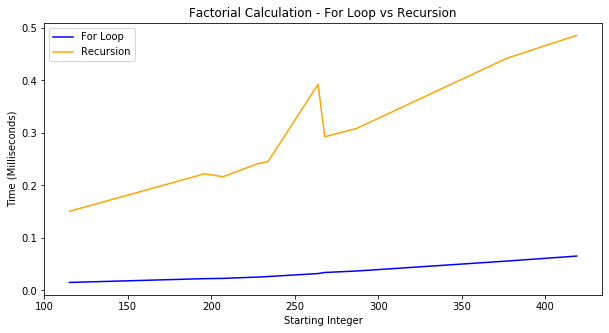

In [84]:
def comparison_plot():
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(results["starting_int"], results["for_loop_time"], color="blue")
    ax.plot(results["starting_int"], results["recursion_time"], color="orange")
    ax.set_title("Factorial Calculation - For Loop vs Recursion")
    ax.set_ylabel("Time (Milliseconds)")
    ax.set_xlabel("Starting Integer")
    ax.legend(["For Loop", "Recursion"])
    plt.show()
    

comparison_plot()

## Extra Credit 2: Directory Tree Traversal  
The files on a hard drive are saved in a tree-like structure.  Write a function that will print out every file from a given root using a recursive algorithm.  This is called Directory Tree Traversal (https://www.pythoncentral.io/how-to-traverse-a-directory-tree-in-python-guide-to-os-walk/).  You may not use any packages to do this (like `os.walk`, or `glob`), except to list the files and directories in a single directory.  In other words, you are responsible for the traversal.

In [151]:
def dir_tree_traverse(dir: str):
    if os.path.isfile(dir):
        print(dir.split("/")[-1])

    if os.path.isdir(dir):
        for d in os.listdir(dir):
            if os.path.isfile(os.path.join(dir, d)):
                print(d)
            else:
                dir_tree_traverse(os.path.join(dir, d))

This satisfies the base requirement, but it could be extended to exclude dot files and/or handle errors.

In [149]:
# Lets try on the root of this repo.
# We should see quite a bit of git stuff too.
dir_tree_traverse("../")

LICENSE
Makefile
pyproject.toml
README.md
.gitignore
binary_search-checkpoint.ipynb
poetry.lock
ORIG_HEAD
config
416d4913406f3984c2607beb946ada841f11bd
3890371ba85cdf10d828962abbbcf600fa24c2
8ff827340fde3a6b69a9456eb9456d5490c103
d58eeea893a53a767746368d4dfe47fe41ba09
f6cec90e707d4a966969a6104bc7a58af53dbd
fa3c797d843b2a1900c491e077b700046ad6dd
159db9ff450ca7a90f7ff6c5b0eccb0b4921be
cd0ecd90f4231a637dff6491e58b5011cf08b4
6899a940f8dfbad4bdf3584475f73c442e986b
7404b4013db8f64695b2bd1da49e88bf4b822a
d1b2a9392684cc17e07d15574084a551d3e50b
471f8dc349f83b9e1161deeb858219046086d1
7f6fc52f96afe41d70272f823e3140304470c4
ccaf3a0ed736e929b55bf92433863d1f11c308
0e17524a9d17fca2cfabe8ac4e58891e250234
bd1b89c3de33a60e58586a190d606768025098
f13084bf22cf8cbe7de9eb559563ced6099e1e
0ec9cee3cb34c702981a0d24e71dc8e8c3b462
5c36e9515de6c6d5ad3fb08e06d8275ae1f0d8
ddf1a0fae92c1eaa9631e41ec4725b36331028
75e3ae63f561e5e7bfea9179c8a58b572dd9dd
db088994fae7cbf594bc0f65001d8dd46f7ca3
ef6918166f02d8f2e81d43f35baf3

## Executive Summary  
It is quite obvious from our graphic above that a for loop is much faster than a recursive function call for this use case. Our recursive function must save the information for each function call until it reaches the termination criteria. Once it reaches the criteria, the functions begin returning starting at the innermost call. This becomes memory intensive very quickly, especially when calculating factorials as they produce large integers. This is part of the reason that python caps out a recursive function at 1000 calls as a default. It can become quite easy to run out of memory in that time span when dealing with bigger amounts of data.  

I recommend that management only consider a recursive function when the solution will not hinder performance. Recursive functions can be much simpler and easier to read than convoluted for loops, thus making them maintainable for future developers. Thorough bencharmking is also recommended to ensure that a recursive call will not throw out of memory errors or run infinitely (lacks termination criteria).